In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

In [11]:
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [9]:
(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

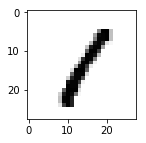

In [15]:
plot_image(x_train[3])

In [17]:
y_train[0]

5

In [18]:
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()


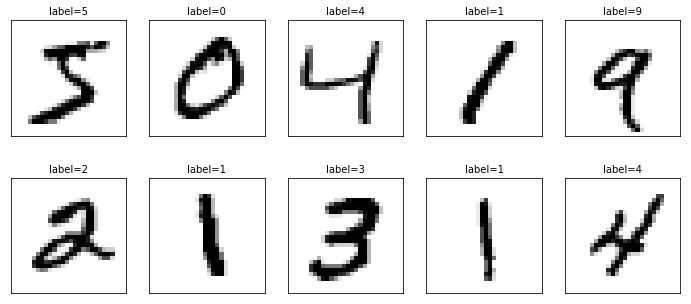

In [20]:
plot_images_labels_prediction(x_train,y_train,[],0,10)

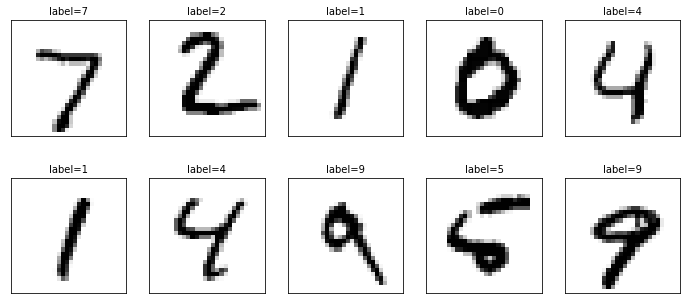

In [22]:
plot_images_labels_prediction(x_test,y_test,[],0,10)

# Title

**bold**

text

In [26]:
# Add color dimension
x_train4D=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [32]:
# Normalize the num to 0-1
x_train4D_normalize=x_train4D/np.amax(x_train4D)
x_test4D_normalize=x_test4D/np.amax(x_test4D)

In [33]:
# Onehot encoding to the label
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

In [36]:
y_TestOneHot

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

# Build CNN Model

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [38]:
model = Sequential()

In [39]:
#filter=16, Kernel size=(5,5),Padding=(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [40]:
# MaxPooling size is (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [41]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [42]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [43]:
# Drop some nodes to avoid overfitting
model.add(Dropout(0.25))

In [44]:
# Flatten
model.add(Flatten())

In [45]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dropout(0.5))

In [46]:
model.add(Dense(10,activation='softmax'))

In [47]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# Train CNN Model

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [50]:
train_history=model.fit(x=x_train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 103s - loss: 0.3676 - acc: 0.8890 - val_loss: 0.1046 - val_acc: 0.9695
Epoch 2/20
 - 91s - loss: 0.0924 - acc: 0.9714 - val_loss: 0.0665 - val_acc: 0.9804
Epoch 3/20
 - 103s - loss: 0.0680 - acc: 0.9785 - val_loss: 0.0517 - val_acc: 0.9845
Epoch 4/20
 - 85s - loss: 0.0537 - acc: 0.9834 - val_loss: 0.0498 - val_acc: 0.9844
Epoch 5/20
 - 97s - loss: 0.0449 - acc: 0.9854 - val_loss: 0.0446 - val_acc: 0.9865
Epoch 6/20
 - 80s - loss: 0.0390 - acc: 0.9876 - val_loss: 0.0399 - val_acc: 0.9874
Epoch 7/20
 - 98s - loss: 0.0346 - acc: 0.9890 - val_loss: 0.0360 - val_acc: 0.9893
Epoch 8/20
 - 97s - loss: 0.0293 - acc: 0.9905 - val_loss: 0.0416 - val_acc: 0.9864
Epoch 9/20
 - 98s - loss: 0.0276 - acc: 0.9905 - val_loss: 0.0343 - val_acc: 0.9898
Epoch 10/20
 - 105s - loss: 0.0239 - acc: 0.9918 - val_loss: 0.0375 - val_acc: 0.9896
Epoch 11/20
 - 103s - loss: 0.0204 - acc: 0.9931 - val_loss: 0.0356 - val_acc: 0.9890
Epoch 12/20
 - 111s 

In [51]:
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

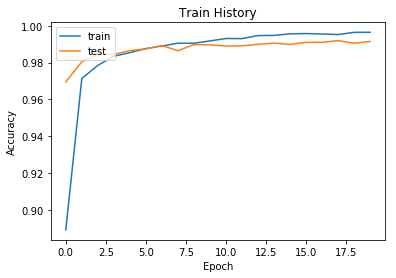

In [52]:
show_train_history('acc','val_acc')

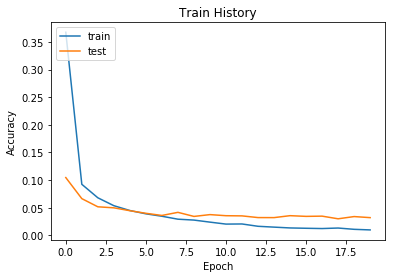

In [53]:
show_train_history('loss','val_loss')


# Measure the Model Accuracy

In [55]:
scores = model.evaluate(x_test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 8s 782us/step


0.99139999999999995

# Prediction

In [57]:
prediction=model.predict_classes(x_test4D_normalize)

In [58]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])